## Car Price Prediction

### Problem Statement

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase-

1. Data Collection Phase
I have done web scraping to collect the data of used cars from the well known website www.cardekho.com and fetched data for different locations. As per the requirement of our client we need to build the model to predict the prices of these used cars.

2. Model Building Phase
After collecting the data, I need to build a machine learning model. Before model building we need to do all data pre-processing steps. The complete life cycle of data science that I have used in this project are as follows:

Data Cleaning

Exploratory Data Analysis

Data Pre-processing

Model Building

Model Evaluation

Selecting the best model


In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df = pd.read_excel("Used_cars_data.xlsx",index_col=0)
df

,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,2017 Volkswagen Vento,Petrol,"43,688 kms",1197,Automatic,18.19 kmpl,5,Titanium Beige,103.2,Ventilated Disc,Drum,494,1467,1699,4390,1720,9,185 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.58 Lakh
1,2015 Hyundai Verna,Petrol,"79,290 kms",1591,Manual,17.01 kmpl,5,Pure white,121.4,Disc,Drum,465-litres,1475,1700,4375,-,9,196 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,5.88 Lakh
2,2017 Volkswagen Vento,Petrol,"49,612 kms",1197,Automatic,18.19 kmpl,5,Carbon Steel,103.2,Ventilated Disc,Drum,494,1467,1699,4390,1720,9.5,185 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.53 Lakh
3,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16 kmpl,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,-,9.5,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,16.78 Lakh
4,2016 Hyundai Grand i10,Petrol,"59,313 kms",1197,Automatic,18.9 kmpl,5,Wine Red,82,Disc,Drum,256-liters,1520,1660,3765,-,9,163 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,5.63 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,2020 BMW X7,Petrol,"1,80,000 kms",2998,Automatic,10.54 kmpl,7,Grey,335.25,Disc,Disc,-,1805,2218,5150,-,-,245,https://www.cardekho.com/used-cars+in+lucknow,1.23 Cr
5175,2021 Jeep Wrangler,Petrol,"10,000 kms",1998,Automatic,12.1 kmpl,5,Black,268,Ventilated Disc,Ventilated Disc,-,1838,1894,4882,-,-,-,https://www.cardekho.com/used-cars+in+lucknow,61.95 Lakh
5176,2017 Hyundai EON,Petrol,"85,416 kms",814,Manual,21.1 kmpl,5,Star Dust,55.2,Disc,Drum,215-litres,1500,1550,3495,-,-,135 Kmph,https://www.cardekho.com/used-cars+in+lucknow,2.72 Lakh
5177,2011 Hyundai i10,Petrol,"1,11,408 kms",1086,Manual,19.81 kmpl,5,Grey,68.05,Ventilated Disc,Drum,225-litres,1550,1595,3585,-,-,165 Kmph,https://www.cardekho.com/used-cars+in+lucknow,1.80 Lakh


There are 5179 rows and 20 columns in the dataframe. The dataset contains both numerical and categorical data. There are both dependent and independent variables present in the dataframe. We have our target variable "Price" which stores the price of the used cars and it is continuous in nature which makes this to be a "Regression Problem".

### Preprocessing and Exploratory Data Analysis (EDA)

In [3]:
# Checking shape of my dataset
df.shape

(5179, 20)

In [4]:
# Checking all column names of dataset
df.columns

Index(['Car_Name', 'Fuel_type', 'Running_in_kms', 'Endine_disp',
       'Gear_transmission', 'Milage_in_km/ltr', 'Seating_cap', 'color',
       'Max_power', 'front_brake_type', 'rear_brake_type', 'cargo_volume',
       'height', 'width', 'length', 'Weight', 'Insp_score', 'top_speed',
       'City_url', 'Car_price'],
      dtype='object')

In [5]:
# Checking the data types of all columns in dataset
df.dtypes

Car_Name             object
Fuel_type            object
Running_in_kms       object
Endine_disp          object
Gear_transmission    object
Milage_in_km/ltr     object
Seating_cap          object
color                object
Max_power            object
front_brake_type     object
rear_brake_type      object
cargo_volume         object
height               object
width                object
length               object
Weight               object
Insp_score           object
top_speed            object
City_url             object
Car_price            object
dtype: object

In [6]:
df['Car_price']

0        7.58 Lakh
1        5.88 Lakh
2        7.53 Lakh
3       16.78 Lakh
4        5.63 Lakh
           ...    
5174       1.23 Cr
5175    61.95 Lakh
5176     2.72 Lakh
5177     1.80 Lakh
5178    79.00 Lakh
Name: Car_price, Length: 5179, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5179 entries, 0 to 5178
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_Name           5179 non-null   object
 1   Fuel_type          5179 non-null   object
 2   Running_in_kms     5179 non-null   object
 3   Endine_disp        5179 non-null   object
 4   Gear_transmission  5179 non-null   object
 5   Milage_in_km/ltr   5179 non-null   object
 6   Seating_cap        5178 non-null   object
 7   color              5179 non-null   object
 8   Max_power          5179 non-null   object
 9   front_brake_type   5178 non-null   object
 10  rear_brake_type    5178 non-null   object
 11  cargo_volume       5178 non-null   object
 12  height             5178 non-null   object
 13  width              5178 non-null   object
 14  length             5178 non-null   object
 15  Weight             5179 non-null   object
 16  Insp_score         5179 non-null   object


All the columns are of object data type, but we can see some columns which need to be converted into integer data type.

In [8]:
# Value counts of each column.
for i in df.columns:
        print(df[i].value_counts())
        print('-------------------------------------------------')

2017 Hyundai Grand i10         48
2017 Maruti Baleno             47
2017 Hyundai Creta             46
2016 Hyundai Creta             44
2018 Hyundai Creta             43
                               ..
2000 Hyundai Santro             1
2010 Audi Q7                    1
2016 Isuzu D-Max                1
2007 Maruti Omni                1
2021 Mercedes-Benz AMG C 43     1
Name: Car_Name, Length: 1180, dtype: int64
-------------------------------------------------
Petrol      3240
Diesel      1786
CNG          137
Electric      14
LPG            2
Name: Fuel_type, dtype: int64
-------------------------------------------------
80,000 kms      66
60,000 kms      64
70,000 kms      59
40,000 kms      57
50,000 kms      52
                ..
6,975 kms        1
38,135 kms       1
28,642 kms       1
38,718 kms       1
1,11,408 kms     1
Name: Running_in_kms, Length: 2476, dtype: int64
-------------------------------------------------
1197     763
1497     331
998      328
1199     208
1591    

In [9]:
# Checking unique values of each column
df.nunique()

Car_Name             1180
Fuel_type               5
Running_in_kms       2476
Endine_disp           162
Gear_transmission       2
Milage_in_km/ltr      452
Seating_cap            12
color                 200
Max_power             474
front_brake_type       29
rear_brake_type        31
cargo_volume          304
height                315
width                 286
length                388
Weight                255
Insp_score             11
top_speed             259
City_url               10
Car_price            1118
dtype: int64

### Feature Extraction

In [10]:
# Extracting 'Price' values from Price
df['Car_price'] = df['Car_price'].str.split().str[0]
df

,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,2017 Volkswagen Vento,Petrol,"43,688 kms",1197,Automatic,18.19 kmpl,5,Titanium Beige,103.2,Ventilated Disc,Drum,494,1467,1699,4390,1720,9,185 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.58
1,2015 Hyundai Verna,Petrol,"79,290 kms",1591,Manual,17.01 kmpl,5,Pure white,121.4,Disc,Drum,465-litres,1475,1700,4375,-,9,196 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,5.88
2,2017 Volkswagen Vento,Petrol,"49,612 kms",1197,Automatic,18.19 kmpl,5,Carbon Steel,103.2,Ventilated Disc,Drum,494,1467,1699,4390,1720,9.5,185 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.53
3,2019 Jeep Compass,Petrol,"32,294 kms",1368,Automatic,16 kmpl,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,-,9.5,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,16.78
4,2016 Hyundai Grand i10,Petrol,"59,313 kms",1197,Automatic,18.9 kmpl,5,Wine Red,82,Disc,Drum,256-liters,1520,1660,3765,-,9,163 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,5.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,2020 BMW X7,Petrol,"1,80,000 kms",2998,Automatic,10.54 kmpl,7,Grey,335.25,Disc,Disc,-,1805,2218,5150,-,-,245,https://www.cardekho.com/used-cars+in+lucknow,1.23
5175,2021 Jeep Wrangler,Petrol,"10,000 kms",1998,Automatic,12.1 kmpl,5,Black,268,Ventilated Disc,Ventilated Disc,-,1838,1894,4882,-,-,-,https://www.cardekho.com/used-cars+in+lucknow,61.95
5176,2017 Hyundai EON,Petrol,"85,416 kms",814,Manual,21.1 kmpl,5,Star Dust,55.2,Disc,Drum,215-litres,1500,1550,3495,-,-,135 Kmph,https://www.cardekho.com/used-cars+in+lucknow,2.72
5177,2011 Hyundai i10,Petrol,"1,11,408 kms",1086,Manual,19.81 kmpl,5,Grey,68.05,Ventilated Disc,Drum,225-litres,1550,1595,3585,-,-,165 Kmph,https://www.cardekho.com/used-cars+in+lucknow,1.80


In [11]:
# Extracting 'KMS_driven' from KMS_driven
df['Running_in_kms'] = df['Running_in_kms'].str.split().str[0]
df

,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,rear_brake_type,cargo_volume,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price
0,2017 Volkswagen Vento,Petrol,"43,688",1197,Automatic,18.19 kmpl,5,Titanium Beige,103.2,Ventilated Disc,Drum,494,1467,1699,4390,1720,9,185 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.58
1,2015 Hyundai Verna,Petrol,"79,290",1591,Manual,17.01 kmpl,5,Pure white,121.4,Disc,Drum,465-litres,1475,1700,4375,-,9,196 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,5.88
2,2017 Volkswagen Vento,Petrol,"49,612",1197,Automatic,18.19 kmpl,5,Carbon Steel,103.2,Ventilated Disc,Drum,494,1467,1699,4390,1720,9.5,185 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.53
3,2019 Jeep Compass,Petrol,"32,294",1368,Automatic,16 kmpl,5,Grey,160.77,Disc,Discs,408-litres,1640,1818,4395,-,9.5,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,16.78
4,2016 Hyundai Grand i10,Petrol,"59,313",1197,Automatic,18.9 kmpl,5,Wine Red,82,Disc,Drum,256-liters,1520,1660,3765,-,9,163 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,5.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,2020 BMW X7,Petrol,"1,80,000",2998,Automatic,10.54 kmpl,7,Grey,335.25,Disc,Disc,-,1805,2218,5150,-,-,245,https://www.cardekho.com/used-cars+in+lucknow,1.23
5175,2021 Jeep Wrangler,Petrol,"10,000",1998,Automatic,12.1 kmpl,5,Black,268,Ventilated Disc,Ventilated Disc,-,1838,1894,4882,-,-,-,https://www.cardekho.com/used-cars+in+lucknow,61.95
5176,2017 Hyundai EON,Petrol,"85,416",814,Manual,21.1 kmpl,5,Star Dust,55.2,Disc,Drum,215-litres,1500,1550,3495,-,-,135 Kmph,https://www.cardekho.com/used-cars+in+lucknow,2.72
5177,2011 Hyundai i10,Petrol,"1,11,408",1086,Manual,19.81 kmpl,5,Grey,68.05,Ventilated Disc,Drum,225-litres,1550,1595,3585,-,-,165 Kmph,https://www.cardekho.com/used-cars+in+lucknow,1.80


In [12]:
# Extracting Manufacturing Year from Brand
df['Manuf_Year'] = df['Car_Name'].str.split().str[0]
df['Brand'] = df['Car_Name'].str.split().str[1]
df

,Car_Name,Fuel_type,Running_in_kms,Endine_disp,Gear_transmission,Milage_in_km/ltr,Seating_cap,color,Max_power,front_brake_type,...,height,width,length,Weight,Insp_score,top_speed,City_url,Car_price,Manuf_Year,Brand
0,2017 Volkswagen Vento,Petrol,"43,688",1197,Automatic,18.19 kmpl,5,Titanium Beige,103.2,Ventilated Disc,...,1467,1699,4390,1720,9,185 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.58,2017,Volkswagen
1,2015 Hyundai Verna,Petrol,"79,290",1591,Manual,17.01 kmpl,5,Pure white,121.4,Disc,...,1475,1700,4375,-,9,196 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,5.88,2015,Hyundai
2,2017 Volkswagen Vento,Petrol,"49,612",1197,Automatic,18.19 kmpl,5,Carbon Steel,103.2,Ventilated Disc,...,1467,1699,4390,1720,9.5,185 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,7.53,2017,Volkswagen
3,2019 Jeep Compass,Petrol,"32,294",1368,Automatic,16 kmpl,5,Grey,160.77,Disc,...,1640,1818,4395,-,9.5,186.69 kmph,https://www.cardekho.com/used-cars+in+ahmedabad,16.78,2019,Jeep
4,2016 Hyundai Grand i10,Petrol,"59,313",1197,Automatic,18.9 kmpl,5,Wine Red,82,Disc,...,1520,1660,3765,-,9,163 Kmph,https://www.cardekho.com/used-cars+in+ahmedabad,5.63,2016,Hyundai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5174,2020 BMW X7,Petrol,"1,80,000",2998,Automatic,10.54 kmpl,7,Grey,335.25,Disc,...,1805,2218,5150,-,-,245,https://www.cardekho.com/used-cars+in+lucknow,1.23,2020,BMW
5175,2021 Jeep Wrangler,Petrol,"10,000",1998,Automatic,12.1 kmpl,5,Black,268,Ventilated Disc,...,1838,1894,4882,-,-,-,https://www.cardekho.com/used-cars+in+lucknow,61.95,2021,Jeep
5176,2017 Hyundai EON,Petrol,"85,416",814,Manual,21.1 kmpl,5,Star Dust,55.2,Disc,...,1500,1550,3495,-,-,135 Kmph,https://www.cardekho.com/used-cars+in+lucknow,2.72,2017,Hyundai
5177,2011 Hyundai i10,Petrol,"1,11,408",1086,Manual,19.81 kmpl,5,Grey,68.05,Ventilated Disc,...,1550,1595,3585,-,-,165 Kmph,https://www.cardekho.com/used-cars+in+lucknow,1.80,2011,Hyundai


In [13]:
df.drop("Car_Name",axis=1,inplace=True)

In [14]:
# Converting object data type columns to float data type
df = df.astype({'Car_price':'float', 'Manuf_Year':'int'})

In [15]:
df.dtypes

Fuel_type             object
Running_in_kms        object
Endine_disp           object
Gear_transmission     object
Milage_in_km/ltr      object
Seating_cap           object
color                 object
Max_power             object
front_brake_type      object
rear_brake_type       object
cargo_volume          object
height                object
width                 object
length                object
Weight                object
Insp_score            object
top_speed             object
City_url              object
Car_price            float64
Manuf_Year             int32
Brand                 object
dtype: object

In [16]:
df = pd.DataFrame(df)
df.drop(df.columns[[2, 10, 11, 12, 7, 13, 8, 9, 14, 15, 16,17, 5, 6]], axis=1, inplace=True)

In [17]:
df.columns

Index(['Fuel_type', 'Running_in_kms', 'Gear_transmission', 'Milage_in_km/ltr',
       'Car_price', 'Manuf_Year', 'Brand'],
      dtype='object')

In [18]:
columns = ['Fuel','Kms','Gear','Mileage','Price','Year','Brand']

In [19]:
df.columns=columns

In [20]:
df.columns

Index(['Fuel', 'Kms', 'Gear', 'Mileage', 'Price', 'Year', 'Brand'], dtype='object')

In [21]:
df.dtypes

Fuel        object
Kms         object
Gear        object
Mileage     object
Price      float64
Year         int32
Brand       object
dtype: object

In [22]:
df.head()

,Fuel,Kms,Gear,Mileage,Price,Year,Brand
0,Petrol,"43,688",Automatic,18.19 kmpl,7.58,2017,Volkswagen
1,Petrol,"79,290",Manual,17.01 kmpl,5.88,2015,Hyundai
2,Petrol,"49,612",Automatic,18.19 kmpl,7.53,2017,Volkswagen
3,Petrol,"32,294",Automatic,16 kmpl,16.78,2019,Jeep
4,Petrol,"59,313",Automatic,18.9 kmpl,5.63,2016,Hyundai


In [26]:
import re
df['Kms'] = pd.to_numeric(df['Kms'].apply(lambda miles: ''.join(re.findall(r'[0-9]*', miles))))

In [27]:
df.dtypes

Fuel        object
Kms          int64
Gear        object
Mileage    float64
Price      float64
Year         int32
Brand       object
dtype: object

In [28]:
df.head()

,Fuel,Kms,Gear,Mileage,Price,Year,Brand
0,Petrol,43688,Automatic,18.19,7.58,2017,Volkswagen
1,Petrol,79290,Manual,17.01,5.88,2015,Hyundai
2,Petrol,49612,Automatic,18.19,7.53,2017,Volkswagen
3,Petrol,32294,Automatic,16.00,16.78,2019,Jeep
4,Petrol,59313,Automatic,18.90,5.63,2016,Hyundai


In [29]:
# Checking null values in the dataset
df.isnull().sum()

Fuel       0
Kms        0
Gear       0
Mileage    0
Price      0
Year       0
Brand      0
dtype: int64

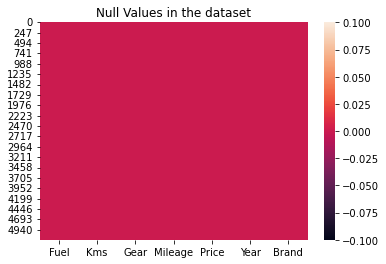

In [30]:
# Visualizing null values in the dataset
sns.heatmap(df.isnull())
plt.title("Null Values in the dataset")
plt.show()

In [31]:
# Checking description of data in the dataset
df.describe()

,Kms,Mileage,Price,Year
count,5.179000e+03,5179.000000,5179.000000,5179.000000
mean,5.286635e+04,17.697104,581.234601,2015.437922
std,1.069415e+05,5.279202,6535.660973,3.614239
min,4.000000e+02,0.000000,1.000000,1992.000000
25%,2.888950e+04,15.500000,4.500000,2013.000000
50%,4.792500e+04,18.000000,6.900000,2016.000000
75%,6.900000e+04,20.520000,12.250000,2018.000000
max,7.400000e+06,120.000000,99000.000000,2022.000000


In [32]:
#Checking for empty observations in target column
df.loc[df['Price'] == " "]

,Fuel,Kms,Gear,Mileage,Price,Year,Brand


No empty observations.

### Data Visualization

#### Univariate Analysis

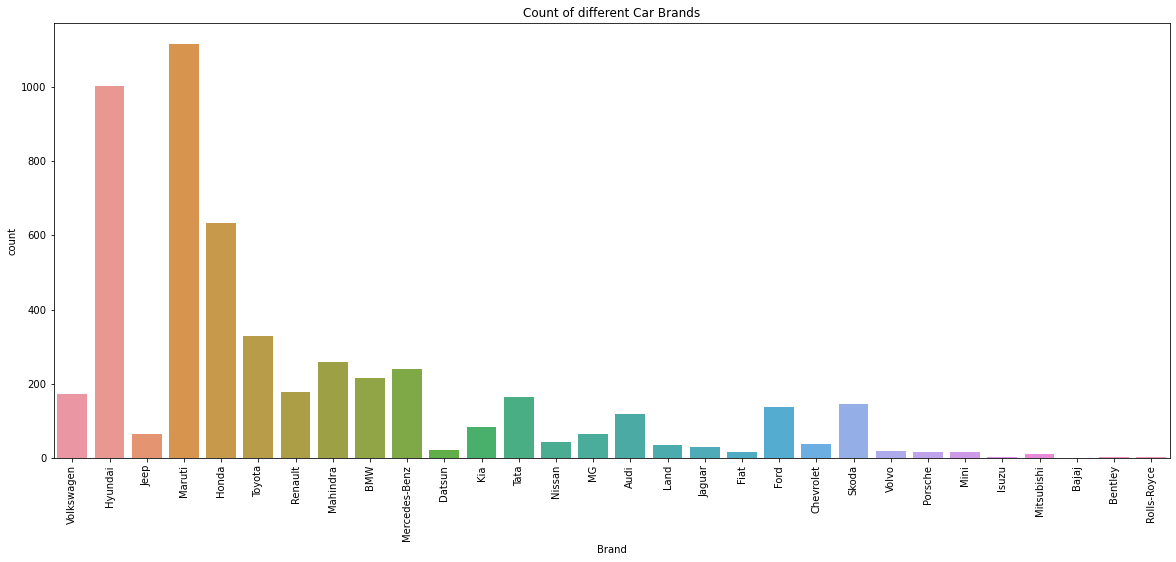

In [33]:
plt.figure(figsize=(20,8))
sns.countplot(df["Brand"])
plt.title("Count of different Car Brands")
plt.xticks(rotation=90)
plt.show()

Most of the car brands are Hyundai, Maruthi, Honda, Toyota. There are very few luxury brand used cars.

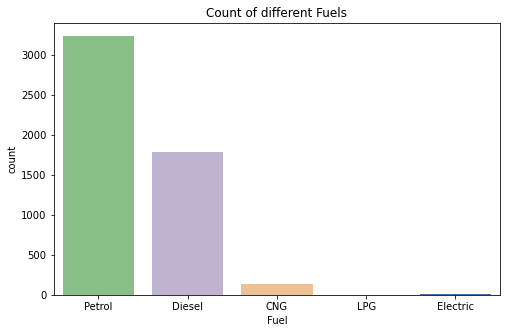

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(df["Fuel"],palette='Accent')
plt.title("Count of different Fuels")
plt.show()

The major fuel type cars would be using petrol follwed by diesel. The least used cars would be lpg and electric vehicles.

Manual       3213
Automatic    1966
Name: Gear, dtype: int64


<AxesSubplot:ylabel='Gear'>

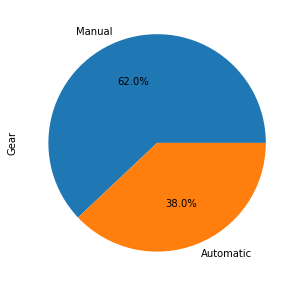

In [36]:
plt.figure(figsize=(10,5))
print(df['Gear'].value_counts())
df['Gear'].value_counts().plot.pie(autopct='%1.1f%%')

Most of the Used cars are of manual Variant (62% ). The rest are Automatic (38%).

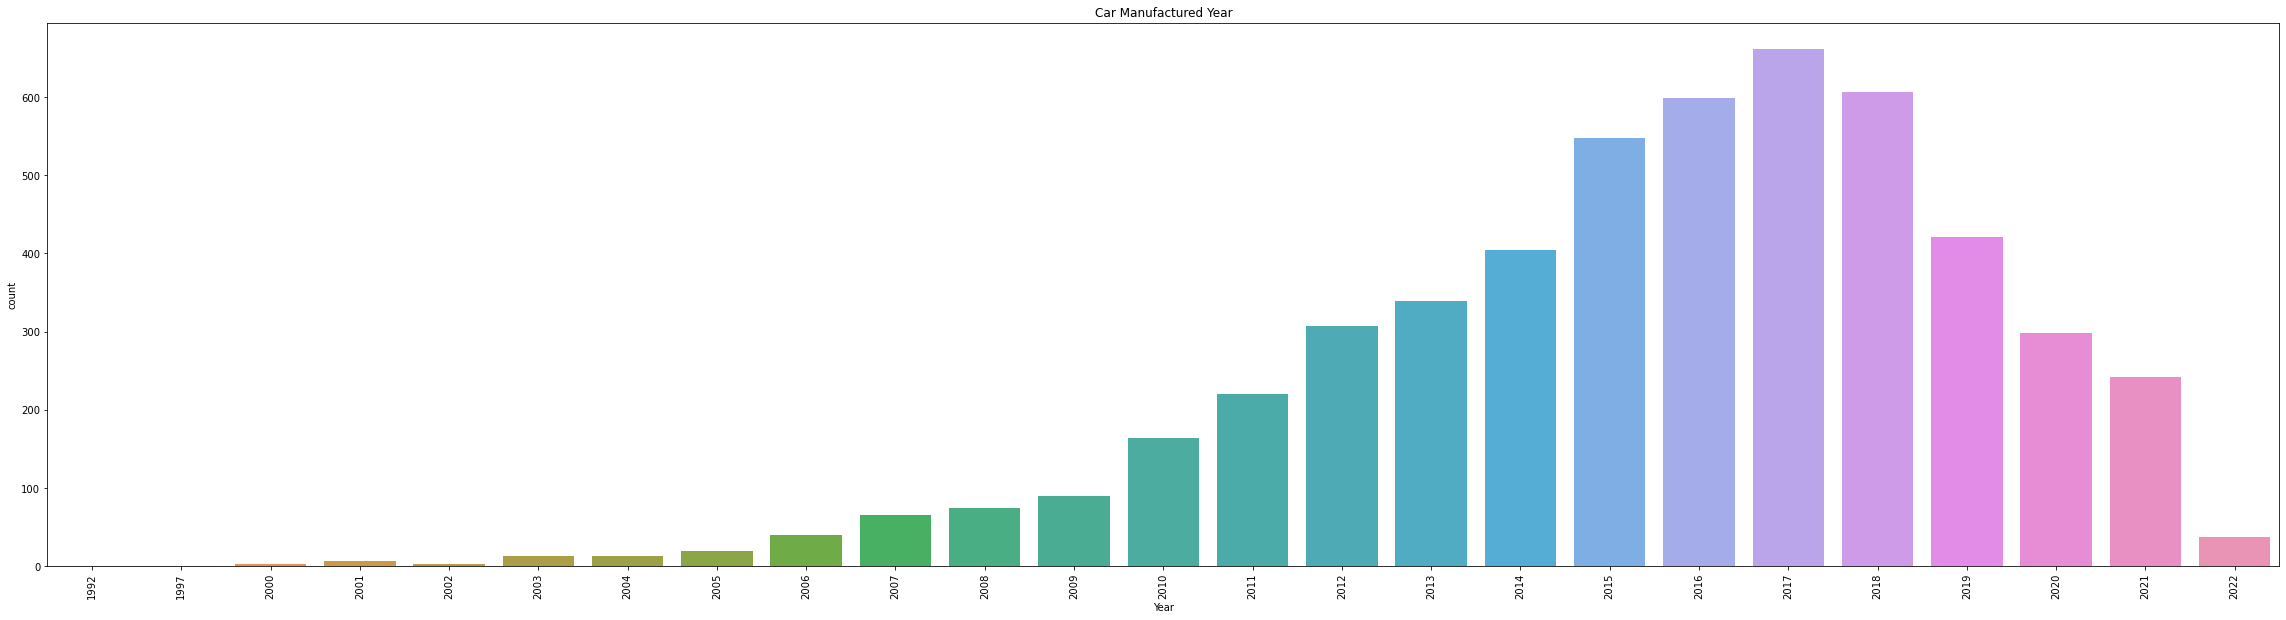

In [37]:
plt.figure(figsize=[40,10])
sns.countplot(df['Year'])
plt.title("Car Manufactured Year")
plt.xticks(rotation=90)
plt.show()

Most of the Used cars are manufactured in 2017 and 2018. Followed by 2016, 2015 & 2019.

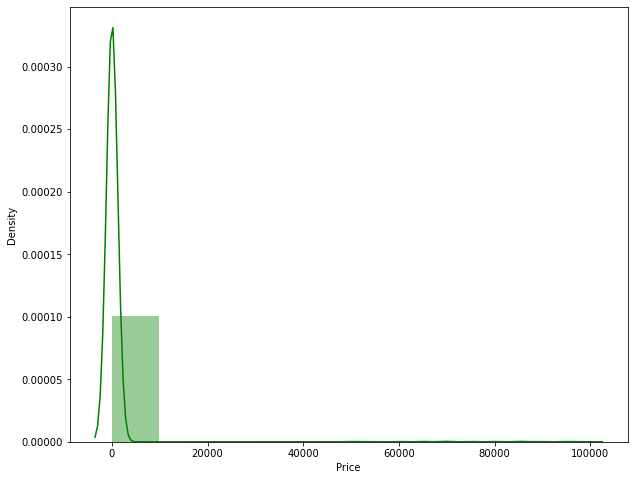

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(df["Price"],bins=10,color='green')
plt.show()

The distribution of Price is normal but it is skewed to the right.

### Bivariate Analysis

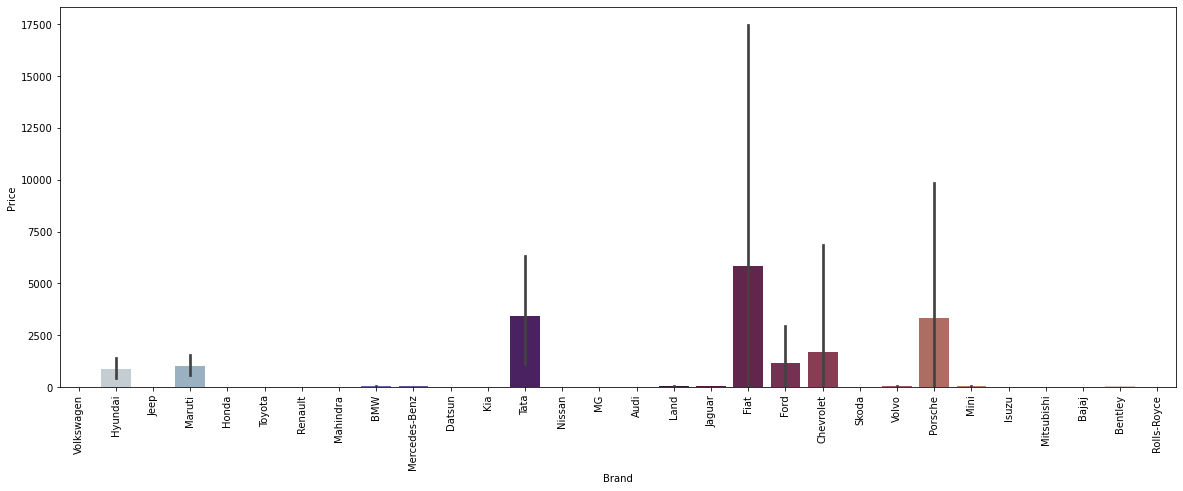

In [40]:
plt.figure(figsize=(20,7))
sns.barplot(x='Brand',y='Price',data=df,palette='twilight')
plt.xticks(rotation=90)
plt.show();


Most of the used cars are of the Maruti. The Prices of Fiat, Porsche &  Chevrolet are high.

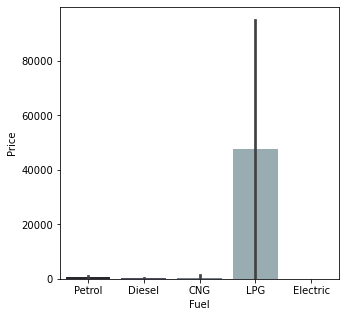

In [41]:
plt.figure(figsize=(5,5))
sns.barplot(x='Fuel',y='Price',data=df,palette='bone')
plt.show();

Most of the cars use petrol as their fuel type, but the highest prices are those which use LPG as their fuel. Next comes petrol CNG follwed by Diesel are the lowest

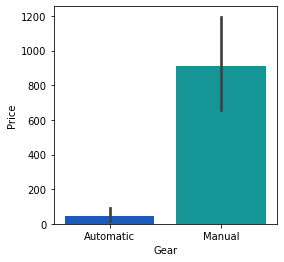

In [42]:
plt.figure(figsize=(4,4))
sns.barplot(x='Gear',y='Price',data=df,palette='winter')
plt.show();

Most of the used cars are Manual, they are also the ones with the highest prices.

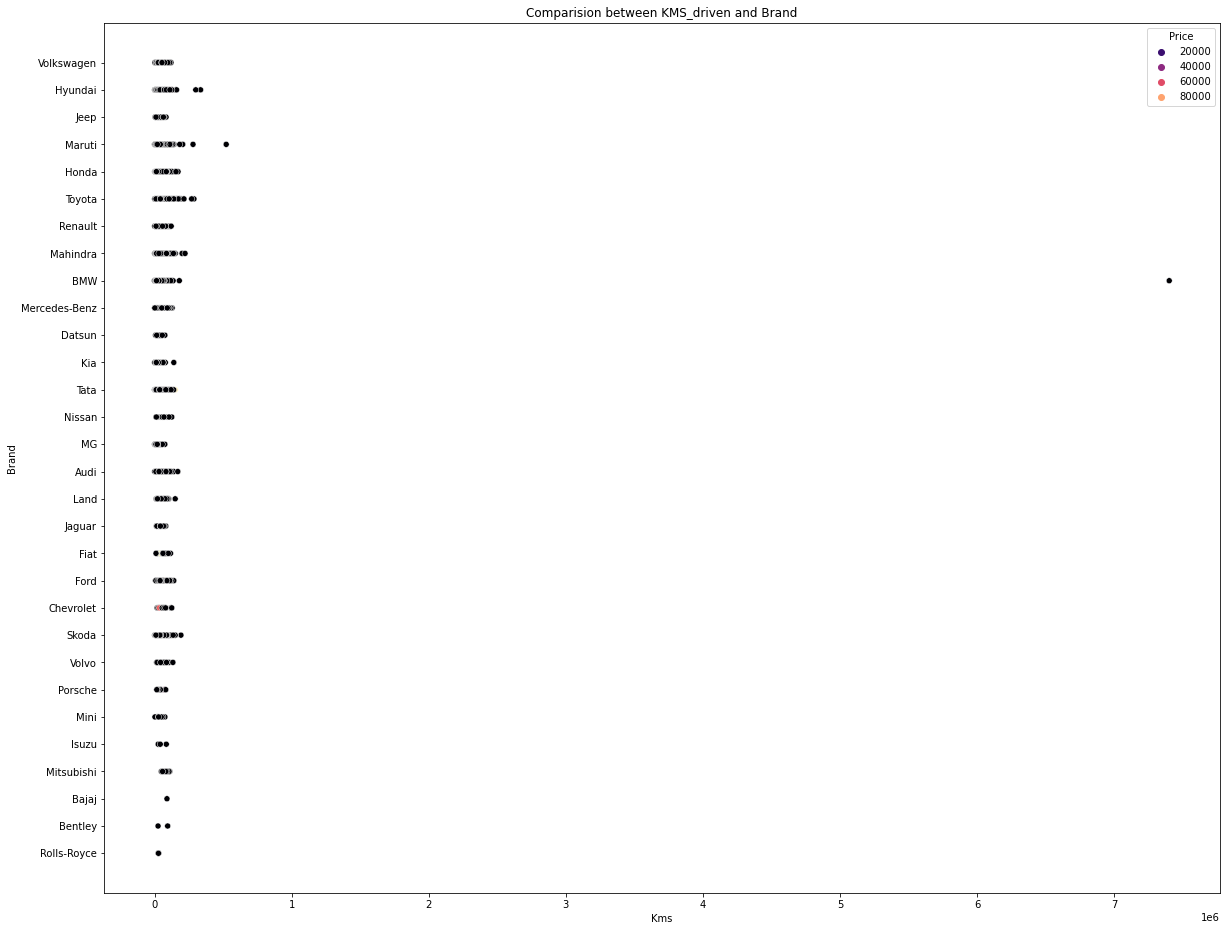

In [49]:
plt.figure(figsize=[20,16])
plt.title('Comparision between KMS_driven and Brand')
sns.scatterplot(df['Kms'],df['Brand'],hue=df['Price'],palette="magma");

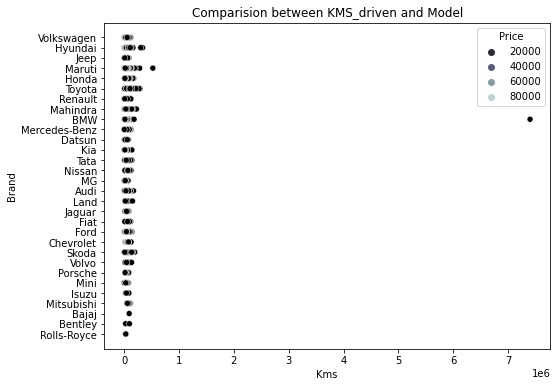

In [50]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Model')
sns.scatterplot(df['Kms'],df['Brand'],hue=df['Price'],palette="bone");

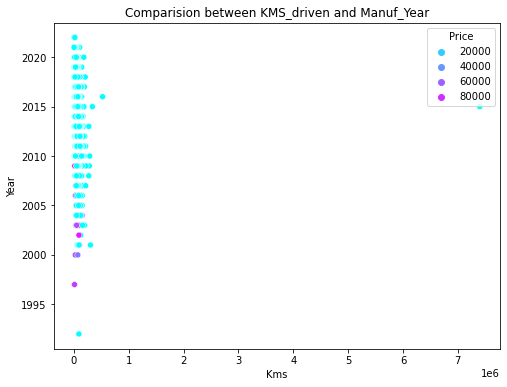

In [54]:
plt.figure(figsize=[8,6])
plt.title('Comparision between KMS_driven and Manuf_Year')
sns.scatterplot(df['Kms'],df['Year'],hue=df['Price'],palette="cool");

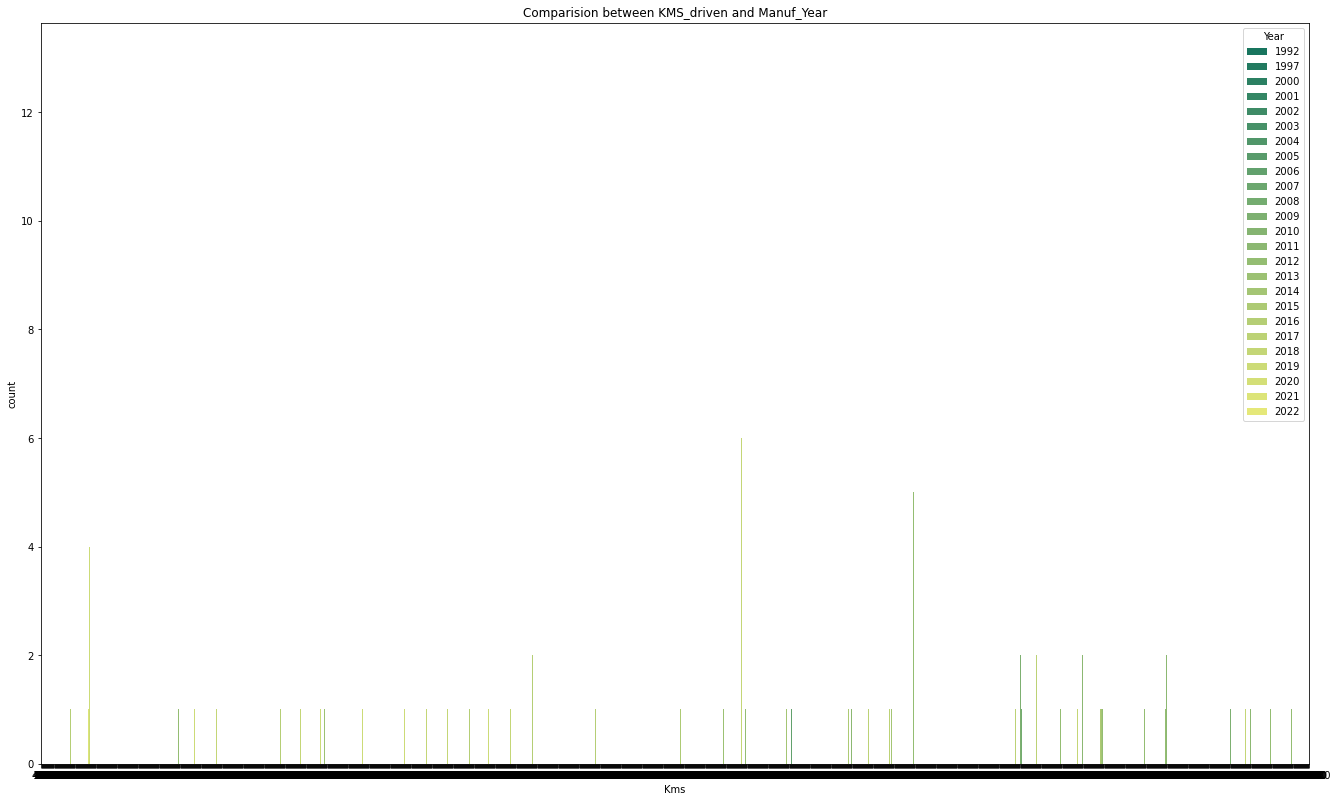

In [59]:
plt.figure(figsize=[50,30])

plt.subplot(2,2,1)
plt.title('Comparision between KMS_driven and Manuf_Year',fontsize=12)
sns.countplot(df['Kms'],hue=df['Year'],palette="summer");

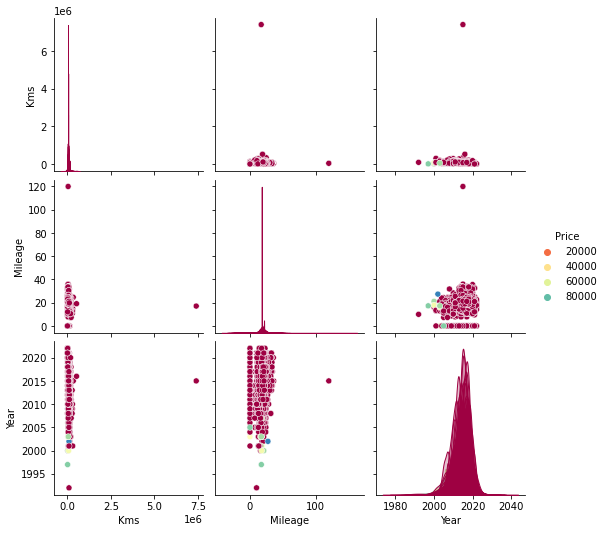

In [60]:
sns.pairplot(df,hue="Price",palette="Spectral")
plt.show()

### Encoding the Data Frame

In [61]:
df.columns

Index(['Fuel', 'Kms', 'Gear', 'Mileage', 'Price', 'Year', 'Brand'], dtype='object')

In [62]:
df.dtypes

Fuel        object
Kms          int64
Gear        object
Mileage    float64
Price      float64
Year         int32
Brand       object
dtype: object

In [63]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [65]:
df['Brand'] = le.fit_transform(df['Brand'])
df['Kms'] = le.fit_transform(df['Kms'])
df['Fuel'] = le.fit_transform(df['Fuel'])
df['Gear'] = le.fit_transform(df['Gear'])

In [66]:
df

,Fuel,Kms,Gear,Mileage,Price,Year,Brand
0,4,1192,0,18.19,7.58,2017,28
1,4,2080,1,17.01,5.88,2015,9
2,4,1384,0,18.19,7.53,2017,28
3,4,804,0,16.00,16.78,2019,12
4,4,1686,0,18.90,5.63,2016,9
...,...,...,...,...,...,...,...
5174,4,2455,0,10.54,1.23,2020,1
5175,4,154,0,12.10,61.95,2021,12
5176,4,2173,1,21.10,2.72,2017,9
5177,4,2361,1,19.81,1.80,2011,9


### Outliers

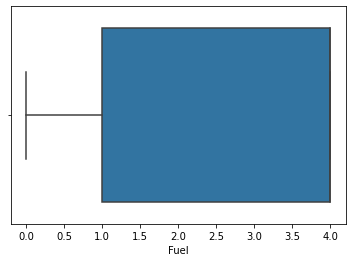

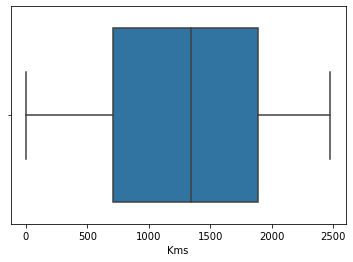

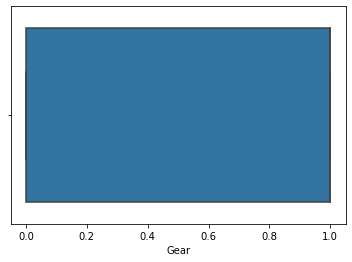

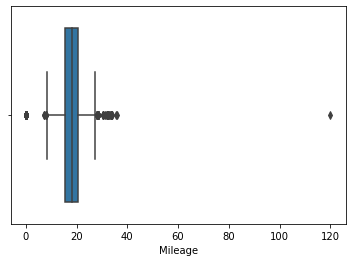

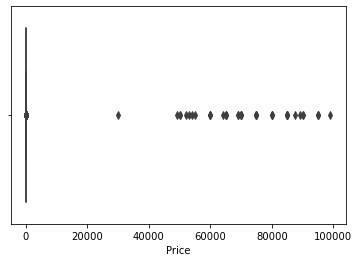

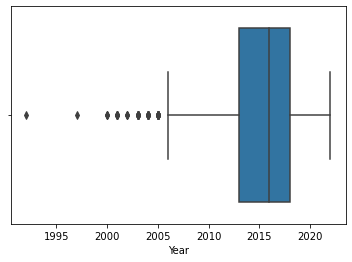

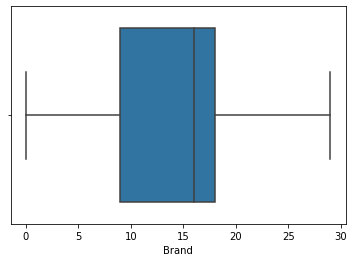

In [67]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

### Removing Outliers

We shall remove the outliers present in the dataset using Z-Score Method.

In [68]:
df_outliers=df[["Brand", "Gear", "Year"]]

In [70]:
from scipy.stats import zscore

z=np.abs(zscore(df_outliers))
df_usedcars=df[(z<3).all(axis=1)]
df_usedcars

,Fuel,Kms,Gear,Mileage,Price,Year,Brand
0,4,1192,0,18.19,7.58,2017,28
1,4,2080,1,17.01,5.88,2015,9
2,4,1384,0,18.19,7.53,2017,28
3,4,804,0,16.00,16.78,2019,12
4,4,1686,0,18.90,5.63,2016,9
...,...,...,...,...,...,...,...
5174,4,2455,0,10.54,1.23,2020,1
5175,4,154,0,12.10,61.95,2021,12
5176,4,2173,1,21.10,2.72,2017,9
5177,4,2361,1,19.81,1.80,2011,9


In [71]:
df_usedcars.shape

(5138, 7)

In [72]:
df.shape

(5179, 7)

In [73]:
Data_loss=((5179-5138)/5179)*100
Data_loss

0.7916586213554739

### Skewness

In [74]:
df_usedcars.skew()

Fuel       -0.556495
Kms        -0.114382
Gear       -0.483076
Mileage     0.533038
Price      15.511571
Year       -0.582288
Brand       0.173402
dtype: float64

In [75]:
df_skew=['Fuel','Gear']

In [76]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [77]:
df_usedcars[df_skew] = scaler.fit_transform(df_usedcars[df_skew].values)

In [78]:
df_usedcars[df_skew].skew()

Fuel   -0.527896
Gear   -0.483076
dtype: float64

In [79]:
# Correlation of dataset
df_usedcars.corr()

,Fuel,Kms,Gear,Mileage,Price,Year,Brand
Fuel,1.000000,-0.298826,0.114400,-0.051875,0.032181,0.016224,-0.076683
Kms,-0.298826,1.000000,0.118185,0.002119,0.032223,-0.607254,0.040020
Gear,0.114400,0.118185,1.000000,0.239223,0.047096,-0.163512,0.079059
Mileage,-0.051875,0.002119,0.239223,1.000000,-0.035911,0.041332,0.012422
Price,0.032181,0.032223,0.047096,-0.035911,1.000000,-0.164758,0.013843
Year,0.016224,-0.607254,-0.163512,0.041332,-0.164758,1.000000,0.051491
Brand,-0.076683,0.040020,0.079059,0.012422,0.013843,0.051491,1.000000


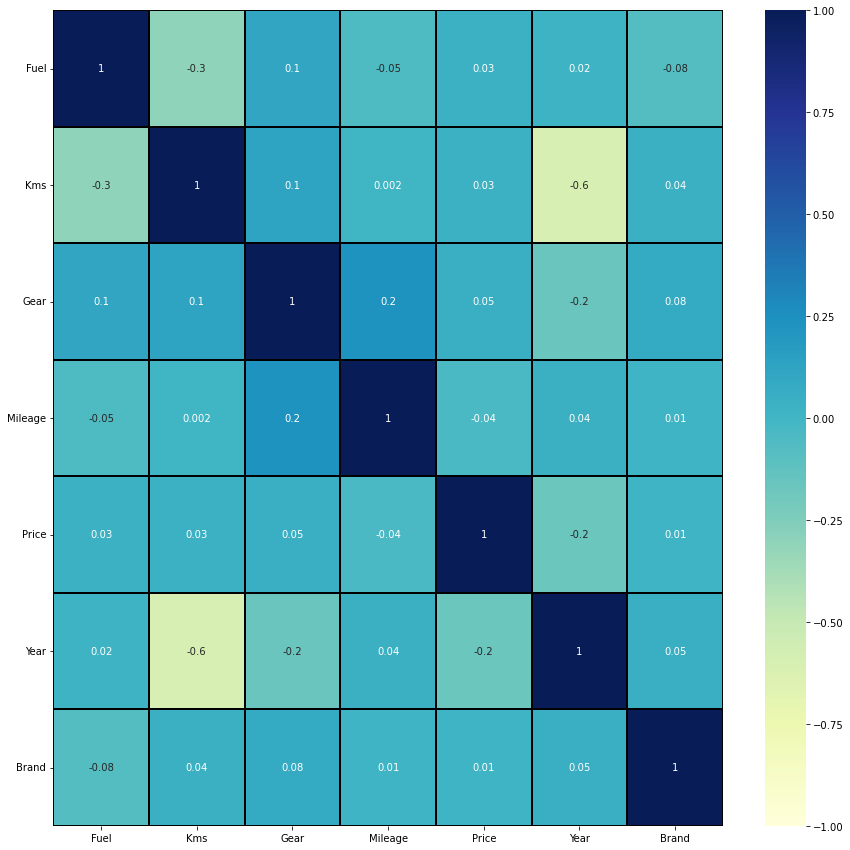

In [80]:
# Visualizing the correlation matrix by plotting heatmap for train dataset.
plt.figure(figsize=(15,15))
sns.heatmap(df_usedcars.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

Km and year negatively correlated with respect to target variable

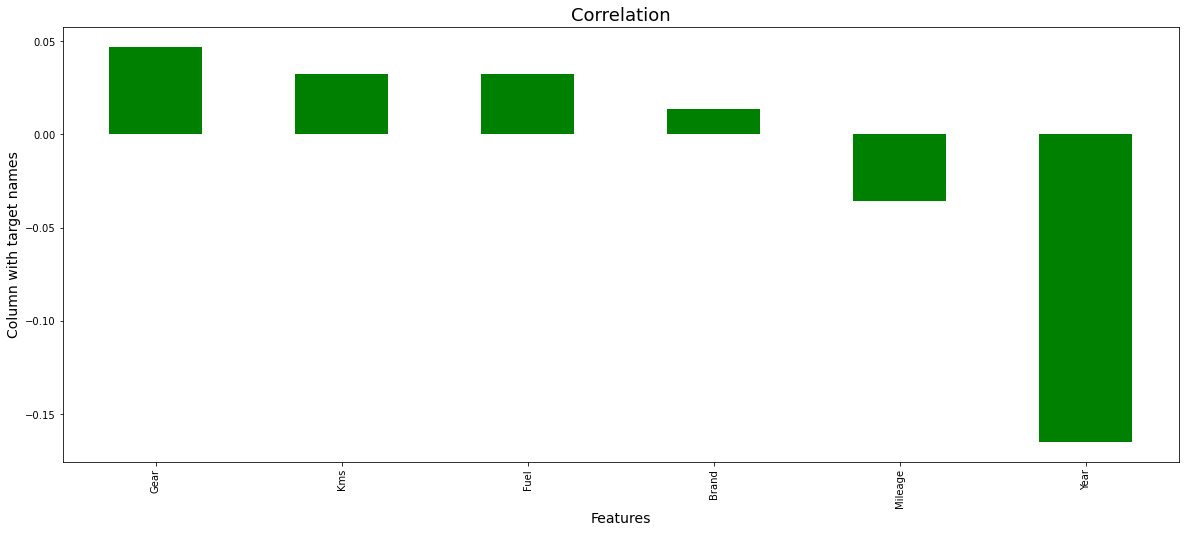

In [81]:
plt.figure(figsize=(20,8))
df_usedcars.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Regression Model Building

In [82]:
x = df_usedcars.drop("Price",axis=1)
y = df_usedcars["Price"]

In [83]:
x.shape

(5138, 6)

In [84]:
y.shape

(5138,)

### Scaling

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Fuel,Kms,Gear,Mileage,Year,Brand
0,0.774516,-0.137648,-1.270208,0.088695,0.425422,1.807111
1,0.774516,1.140656,0.787273,-0.135759,-0.158553,-0.727716
2,0.774516,0.138742,-1.270208,0.088695,0.425422,1.807111
3,0.774516,-0.696186,-1.270208,-0.327876,1.009398,-0.327480
4,0.774516,0.573481,-1.270208,0.223748,0.133435,-0.727716
...,...,...,...,...,...,...
5133,0.774516,1.680481,-1.270208,-1.366450,1.301385,-1.795011
5134,0.774516,-1.631881,-1.270208,-1.069715,1.593373,-0.327480
5135,0.774516,1.274533,0.787273,0.642221,0.425422,-0.727716
5136,0.774516,1.545165,0.787273,0.396844,-1.326504,-0.727716


### VIF

In [86]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.187103,Fuel
1,1.842020,Kms
2,1.132648,Gear
3,1.076538,Mileage
4,1.697167,Year
5,1.022758,Brand


### Best Random  State

In [87]:
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [88]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.30, random_state = i)
    KNN=neighbors.KNeighborsRegressor()
    KNN.fit(x_train,y_train)
    pred_rs=KNN.predict(x_test)
    r2=r2_score(y_test,pred_rs)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 Score is :",maxAccu," on Random State :",maxRS)

Best R2 Score is : 0.2791658183635308  on Random State : 15


In [89]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [91]:
x_train.shape

(3596, 6)

In [92]:
x_test.shape

(1542, 6)

In [93]:

y_train.shape


(3596,)

In [94]:
y_test.shape

(1542,)

### Linear Regression

In [95]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [96]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

pred_lr=lr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_lr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_lr))
print('Mean squared error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))

R2_Score:  0.009471562460826033
Mean absolute error:  1064.5914979355716
Mean squared error:  16061806.024044642
Root Mean squared error:  4007.7183064737274


### Decision Tree Regressor


In [97]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

pred_dtr=dtr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_dtr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_dtr))
print('Mean squared error: ',mean_squared_error(y_test,pred_dtr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_Score:  -0.6571162304116775
Mean absolute error:  356.8296530479896
Mean squared error:  26870787.797160845
Root Mean squared error:  5183.704061495105


### KNearest Neighbors Regressor


In [98]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

pred_knn=knn.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_knn))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_knn))
print('Mean squared error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.2791658183635308
Mean absolute error:  293.4063657587548
Mean squared error:  11688608.183435462
Root Mean squared error:  3418.8606557500207


### SVR

In [99]:

from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

pred_svr=svr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_svr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_svr))
print('Mean squared error: ',mean_squared_error(y_test,pred_svr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  -0.002770081972433891
Mean absolute error:  207.87745325884921
Mean squared error:  16260309.076406095
Root Mean squared error:  4032.407354968753


### Gradient Boosting Regressor

In [100]:

from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

pred_gbr=gbr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_gbr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_gbr))
print('Mean squared error: ',mean_squared_error(y_test,pred_gbr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_gbr)))

R2_Score:  0.17149209627622908
Mean absolute error:  446.5074417369782
Mean squared error:  13434579.699760288
Root Mean squared error:  3665.321227363338


### Extra Trees Regressor

In [101]:

from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

pred_etr=etr.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_etr))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_etr))
print('Mean squared error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.27779955658461986
Mean absolute error:  292.4761341763943
Mean squared error:  11710762.652544348
Root Mean squared error:  3422.099158783151


### XGBoost Regressor

In [102]:

from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)
xgb.score(x_train,y_train)

pred_xgb=xgb.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred_xgb))
print('Mean absolute error: ',mean_absolute_error(y_test,pred_xgb))
print('Mean squared error: ',mean_squared_error(y_test,pred_xgb))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred_xgb)))

R2_Score:  -0.44802982157256044
Mean absolute error:  468.6187439152587
Mean squared error:  23480369.901253466
Root Mean squared error:  4845.654744330581


### Cross Validation Score

In [103]:
from sklearn.model_selection import cross_val_score

In [104]:
scr_ln=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_ln.mean())

Cross validation score of this model is:  0.024560697432373234


In [105]:
scr_dtr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtr.mean())

Cross validation score of this model is:  -0.81613857995115


In [106]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.036885472364587654


In [107]:
scr_svr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svr.mean())

Cross validation score of this model is:  -0.004576131064781786


In [109]:
scr_gbr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gbr.mean())

Cross validation score of this model is:  -0.12484685714882131


In [110]:
scr_etr=cross_val_score(etr,x,y,cv=5)
print("Cross validation score of this model is: ",scr_etr.mean())

Cross validation score of this model is:  -0.026959410385709127


In [111]:
scr_xgb=cross_val_score(xgb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_xgb.mean())

Cross validation score of this model is:  -0.2877924171534925


In [112]:
from sklearn.model_selection import GridSearchCV

In [113]:
parameters = {'n_estimators':[10,100,1000],
             'criterion':['squared_error','mse','absolute_error','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_jobs':[-2,-1,1]}
grid_etr = GridSearchCV(etr, param_grid = parameters, cv = 5)

In [114]:
grid_etr.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 100, 1000],
                         'n_jobs': [-2, -1, 1]})

In [115]:
grid_etr.best_params_

{'criterion': 'mae', 'max_features': 'sqrt', 'n_estimators': 10, 'n_jobs': 1}

In [116]:
Best_model = ExtraTreesRegressor(criterion='mse',max_features='log2',n_jobs=1,n_estimators=10)
Best_model.fit(x_train,y_train)

pred = Best_model.predict(x_test)
print('R2_Score: ',r2_score(y_test,pred))
print('Mean absolute error: ',mean_absolute_error(y_test,pred))
print('Mean squared error: ',mean_squared_error(y_test,pred))
print('Root Mean squared error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2_Score:  0.38846080149267515
Mean absolute error:  273.3056849870298
Mean squared error:  9916347.285219584
Root Mean squared error:  3149.023227164192


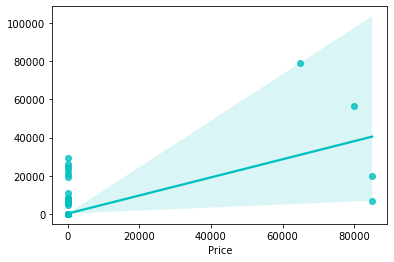

In [117]:
# Visualizing the predicted values
sns.regplot(y_test,pred,color="c")
plt.show()

### Saving Model

In [118]:
import joblib
joblib.dump(Best_model,"Used_Car_Price_Prediction.pkl")

['Used_Car_Price_Prediction.pkl']

In [119]:
# Loading the saved model
used_car_model=joblib.load("Used_Car_Price_Prediction.pkl")

# Prediction
prediction = used_car_model.predict(x_test)
prediction

array([ 8.246, 20.   , 12.776, ...,  5.853,  5.175, 22.65 ])

In [120]:
pd.DataFrame([used_car_model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541
Predicted,8.246,20.00,12.776,4.576,27.444,39.1,6.568,16.348,5.662,5.547,...,7.051,14.515,6.935,7.198,6002.79375,4.385,6.045,5.853,5.175,22.65
Actual,5.750,24.49,14.250,4.850,14.250,33.0,7.990,18.000,4.390,4.250,...,6.750,13.290,6.700,7.850,5.50000,4.250,8.380,5.850,5.350,23.46


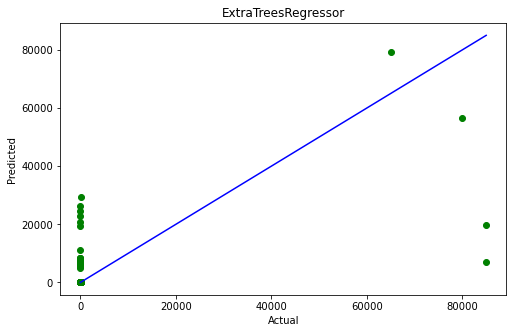

In [121]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, prediction, c='green')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=10)
plt.ylabel('Predicted', fontsize=10)
plt.title("ExtraTreesRegressor")
plt.show()
